In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_dataset = pd.read_csv('iris.csv')

# Sprawdzenie pierwszych kilku wierszy wczytanego zbioru danych
print(iris_dataset.head())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [3]:
# Poprawa nazw kolumn - zamiana '.' na '_'
iris_dataset.columns = iris_dataset.columns.str.replace('.', '_')

# Sprawdzenie poprawności
print(iris_dataset.head())

   sepal_length  sepal_width  petal_length  petal_width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 1.1821 - accuracy: 0.3542 - val_loss: 1.0810 - val_accuracy: 0.3667
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0618 - accuracy: 0.5833 - val_loss: 1.0013 - val_accuracy: 0.6667
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9887 - accuracy: 0.6562 - val_loss: 0.9468 - val_accuracy: 0.7000
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9366 - accuracy: 0.6667 - val_loss: 0.9107 - val_accuracy: 0.7000
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8961 - accuracy: 0.6875 - val_loss: 0.8792 - val_accuracy: 0.7000
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8694 - accuracy: 0.6875 - val_loss: 0.8567 - val_accuracy: 0.7667
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8422 - accuracy: 0.8333 - val_loss: 0.8325 - val_accuracy: 0.8000
Epoch 8/100
2

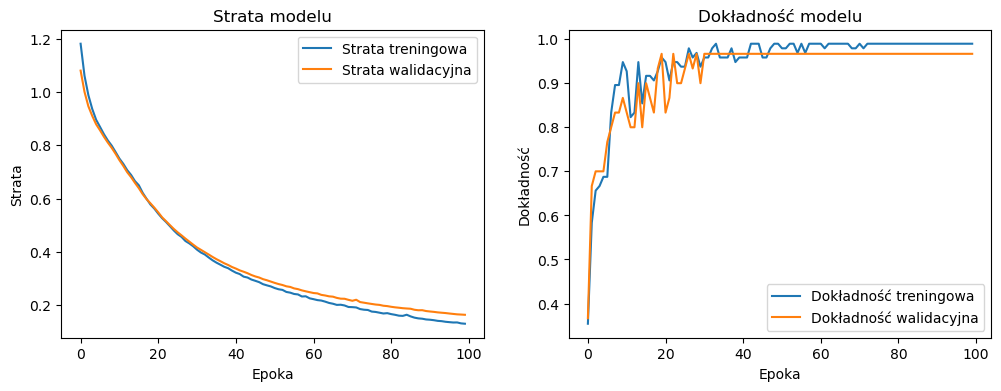

In [4]:
# Podział na cechy(x) i etykiety (y)
X = iris_dataset.iloc[:, :-1].values  # Wszystkie kolumny oprócz ostatniej (cechy)
y = iris_dataset.iloc[:, -1].values   # Ostatnia kolumna to etykiety (gatunki)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Podział zbioru treningowego na dane uczące i walidacyjne
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Zamiana etykiet na liczby (LabelEncoder)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)  # Testowe są tylko transformowane, nie fitowane!

# Zamiana etykiet na one-hot encoding
one_hot_encoder = OneHotEncoder(sparse=False)
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_val = one_hot_encoder.transform(y_val.reshape(-1, 1))
y_test = one_hot_encoder.transform(y_test.reshape(-1, 1))


# Budowa modelu sieci neuronowej
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=5, validation_data=(X_test, y_test))

# Ocena modelu
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Wizualizacja procesu uczenia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.title('Strata modelu')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Dokładność modelu')

plt.show()


Dokładność modelu na zbiorze testowym: 96.67%

Jest to wysoki wynik, co sugeruje, że model dobrze nauczył się klasyfikować gatunki kwiatów.
Nie ma silnych oznak przeuczenia, ponieważ dokładność na zbiorze walidacyjnym nie jest znacząco niższa od treningowej.
Krzywa straty (Loss Curve):

Stabilny spadek wartości funkcji straty zarówno dla zbioru treningowego, jak i walidacyjnego.
Brak dużych fluktuacji między tymi dwoma krzywymi oznacza, że model dobrze generalizuje.
Nie widać oznak przeuczenia – gdyby model był przeuczony, krzywa walidacyjna zaczęłaby rosnąć po pewnej liczbie epok.
Krzywa dokładności (Accuracy Curve):

Zarówno dokładność treningowa, jak i walidacyjna rosną stabilnie.
Pomimo pewnych wahań na początku, od około 30–40 epoki stabilizują się blisko wartości 1.0.
Nie ma istotnych różnic między nimi, co sugeruje, że model nauczył się dobrze i nie jest nadmiernie dopasowany do danych treningowych.

Wnioski z treningu modelu sieci neuronowej na zbiorze Iris:

    Model osiągnął wysoką dokładność na zbiorze testowym (96.67%), co wskazuje na skuteczność nauki i zdolność do klasyfikacji gatunków kwiatów.
    Krzywe uczenia pokazują stabilny spadek wartości funkcji straty i wzrost dokładności, co sugeruje, że model nie jest ani niedouczony, ani przeuczony – zachowuje dobrą zdolność generalizacji.